In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Determine the number of entries in the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Find the top 5 zip codes for 911 calls:

In [4]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

Find the top 5 townships for 911 calls:

In [5]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

How many unique titles (types of calls) are in the data?

In [6]:
df['title'].nunique()

110

Determine the category of the titled reason for each recorded call:

In [7]:
# df['title'].loc[0].split(':')[0]
df['category'] = df['title'].apply(lambda x: x.split(':')[0])
df['category'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: category, dtype: object

What was the most common category for 911 calls?

In [8]:
df['category'].value_counts().head(1)

category
EMS    48877
Name: count, dtype: int64

Check the category distribution visually:

<Axes: xlabel='category', ylabel='count'>

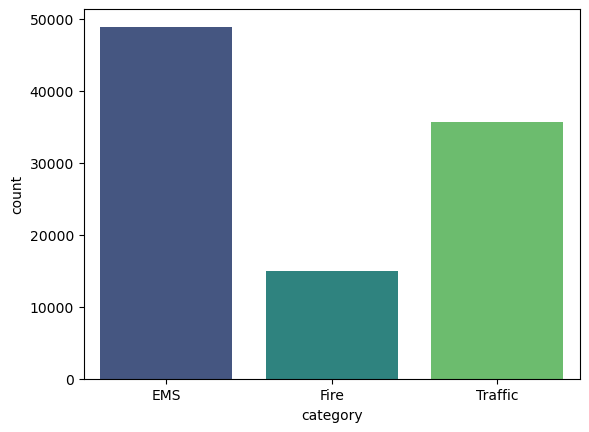

In [9]:
sns.countplot(x='category',data=df,palette='viridis')

Check the specific data type for the timestamp column objects:

In [10]:
type(df['timeStamp'].iloc[0])

str

Coverting string timestamp data to datetime object:

In [11]:
# pd.to_datetime(df['timeStamp'].iloc[0])
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head(5)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

Create new time columns for further analysis:

In [12]:
# df['timeStamp'].iloc[0].month
df['month'] = df['timeStamp'].apply(lambda x: x.month)
print(df['month'].head(5))
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
print(df['hour'].head(5))
df['dow'] = df['timeStamp'].apply(lambda x: x.dayofweek)
print(df['dow'].head(5))

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64
0    17
1    17
2    17
3    17
4    17
Name: hour, dtype: int64
0    3
1    3
2    3
3    3
4    3
Name: dow, dtype: int64


Change dow (day of the week) from an integer value to a string value for the weekday:

In [13]:
dow_name = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dow'] = df['dow'].map(dow_name)
df['dow'].head(5)

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dow, dtype: object

Check for call distribution throughout a week:

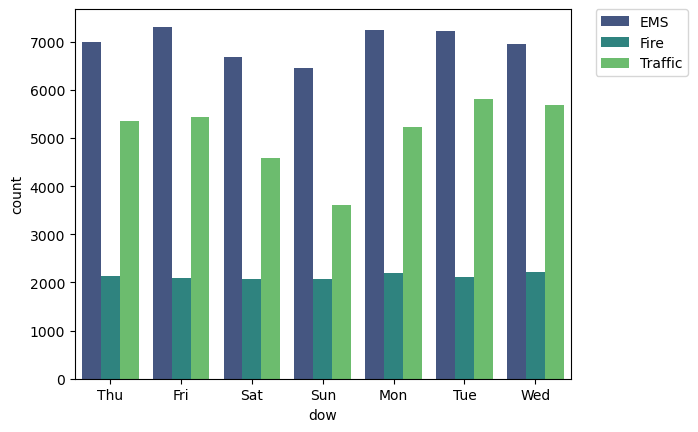

In [14]:
sns.countplot(x='dow',data=df,hue='category',palette='viridis')
# Relocating the legend location for better visibility.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Check for call distribution throughout a month:

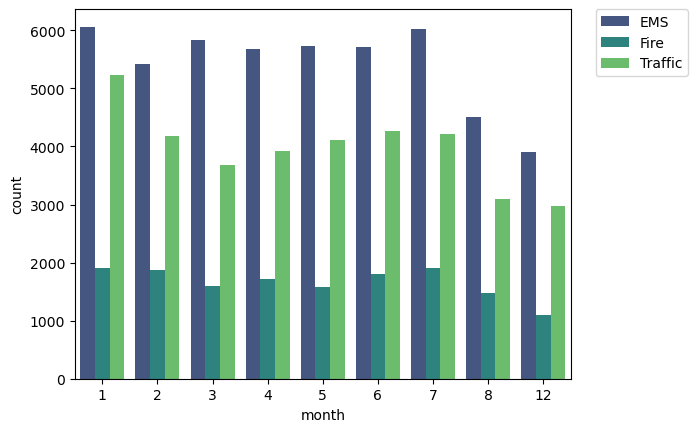

In [15]:
sns.countplot(x='month',data=df,hue='category',palette='viridis')
# Relocate the legend location for better visibility.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# Based on the visualization, it's missing data for some months (9-11).

Find the call count of the columns after grouping by the 'month' column:

In [16]:
byMonth = df.groupby('month').count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,category,hour,dow
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Identify a rough trend for the missing months based on the call counts from the remaining months:

<Axes: xlabel='month'>

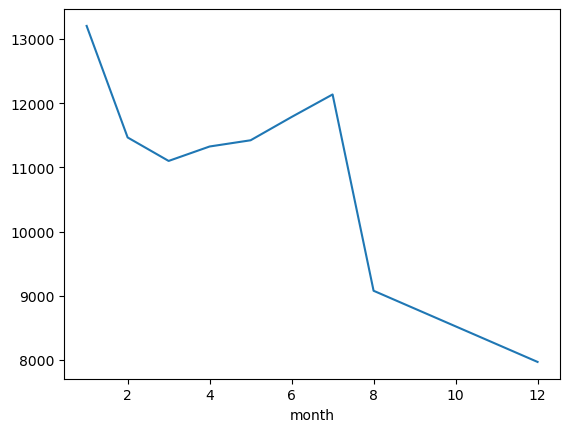

In [17]:
byMonth['lat'].plot()

Reset indexing since the data was sorted by month column, which turned it into the index; and perform a quick regression testing:

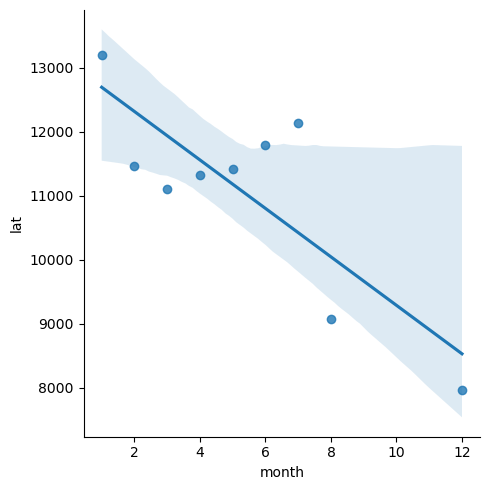

In [18]:
# print(byMonth.reset_index())
sns.lmplot(x='month',y='lat',data=byMonth.reset_index())

Create another new column for date only for further analysis:

In [19]:
# df['timeStamp'].iloc[0].date()
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df['date'].head(5)

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

Plot all calls' volume by date:

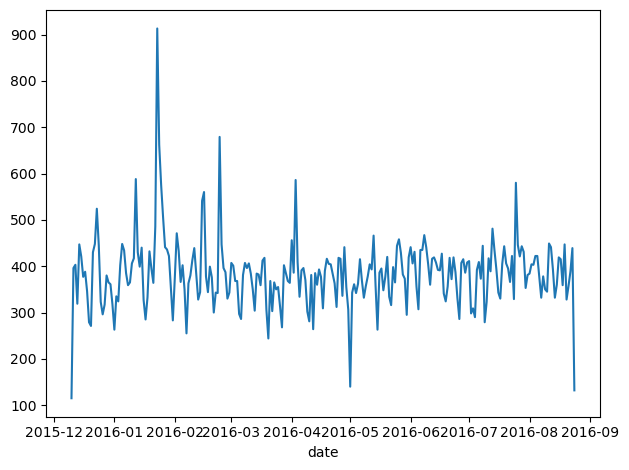

In [20]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

Plot all EMS calls' volume by date:

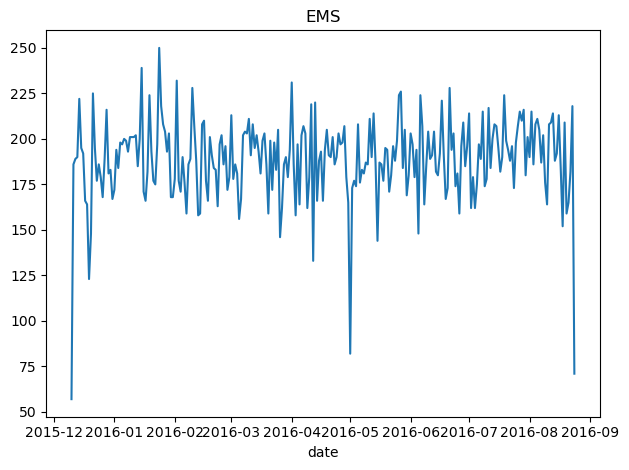

In [21]:
df[df['category']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

Plot all Fire calls' volume by date:

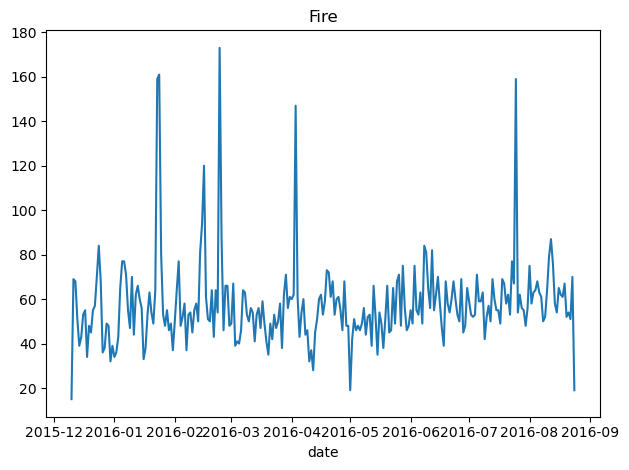

In [22]:
df[df['category']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

Plot all Traffic calls' volume by date:

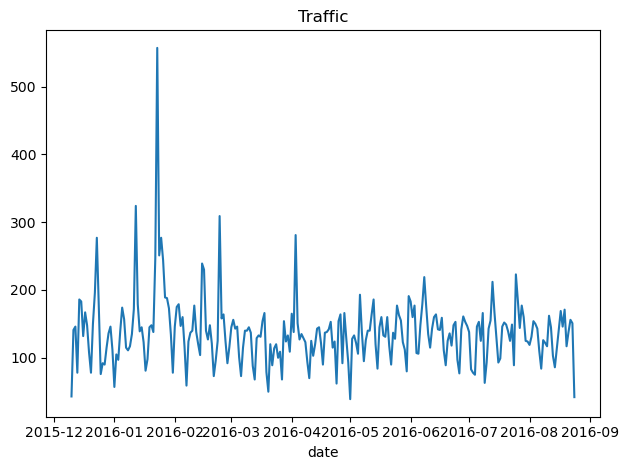

In [23]:
df[df['category']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

Rearranged data in order to use a heatmap for analysis for day of week per hour:

In [24]:
dow_hour = df.groupby(by=['dow','hour']).count()['category'].unstack()
dow_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Perform heatmap analysis to check for patterns based on day and hour of a week:

<Axes: xlabel='hour', ylabel='dow'>

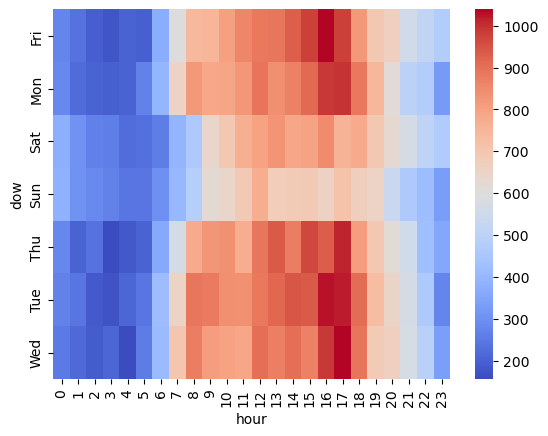

In [25]:
sns.heatmap(data=dow_hour,cmap='coolwarm')

Perform clustermap analysis to check for patterns based on day and hour of a week:

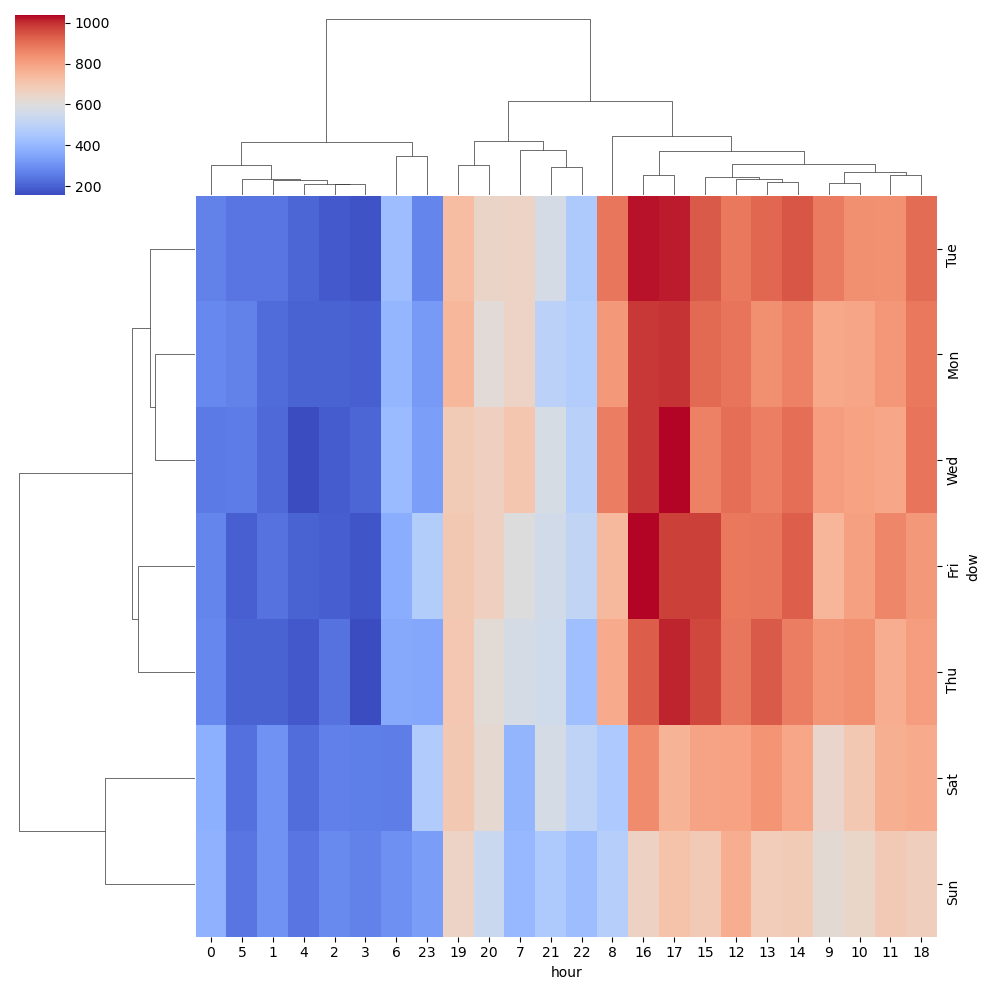

In [26]:
sns.clustermap(data=dow_hour,cmap='coolwarm')

Rearranged data in order to use a heatmap for analysis for day of week per month:

In [27]:
dow_month = df.groupby(by=['dow','month']).count()['category'].unstack()
dow_month

month,1,2,3,4,5,6,7,8,12
dow,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


Perform heatmap analysis to check for patterns based on month and days of the month:

<Axes: xlabel='month', ylabel='dow'>

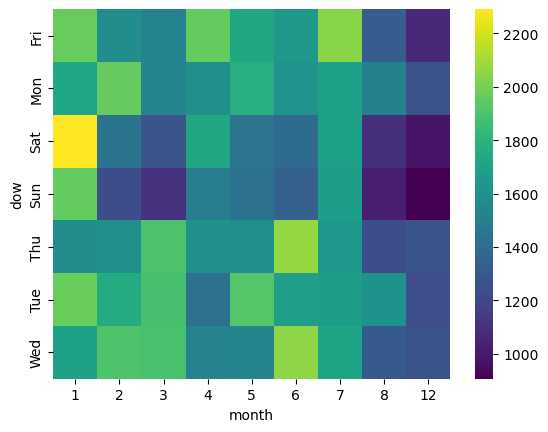

In [28]:
sns.heatmap(data=dow_month,cmap='viridis')

Perform clustermap analysis to check for patterns based on month and days of the month:

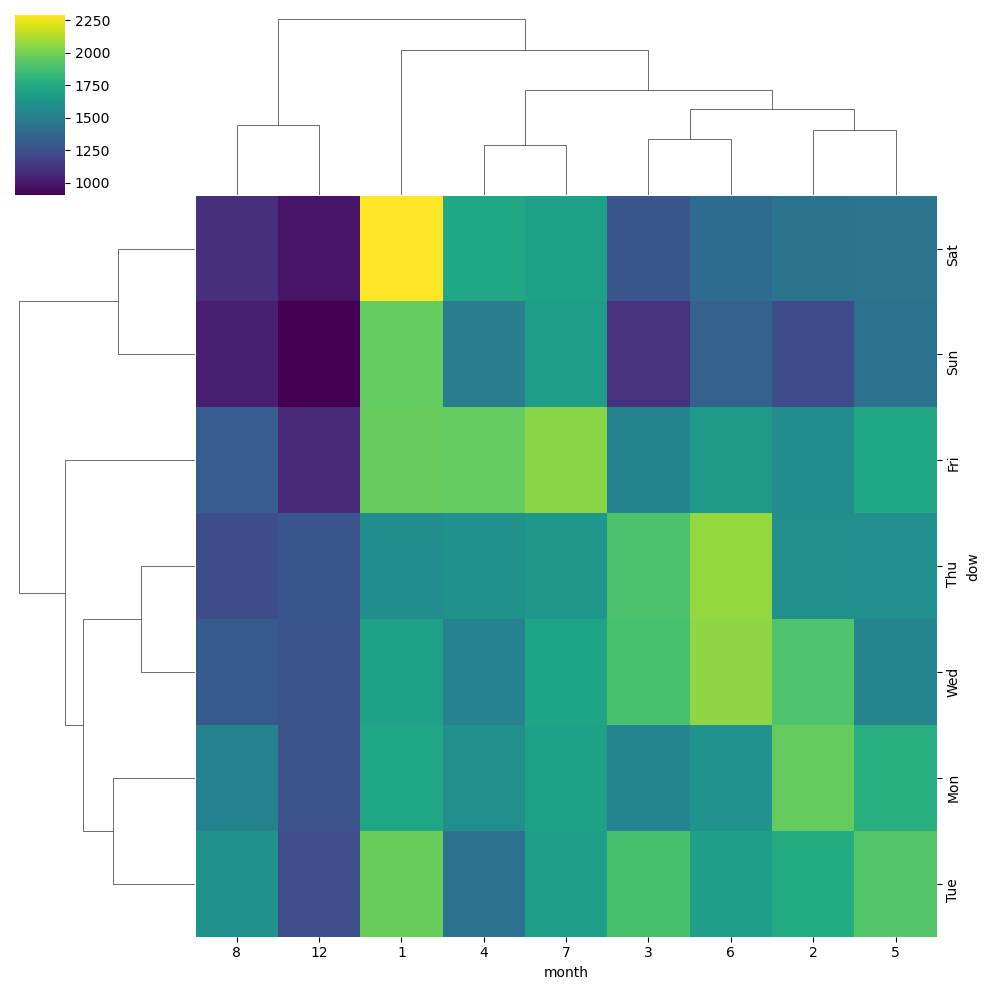

In [29]:
sns.clustermap(data=dow_month,cmap='viridis')